In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preliminary analysis

In [2]:
benchmark_2w1i = 'benchmark_THIN_200w_1000i.txt'
benchmark_2w5i = 'benchmark_THIN_200w_5000i.txt'
benchmark_4w1i = 'benchmark_THIN_400w_1000i.txt'
benchmark_4w5i = 'benchmark_THIN_400w_5000i.txt'

df_2w1i = pd.read_csv(benchmark_2w1i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_2w5i = pd.read_csv(benchmark_2w5i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_4w1i = pd.read_csv(benchmark_4w1i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_4w5i = pd.read_csv(benchmark_4w5i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])

### Mean and Standard Deviation of increase in average latency

In [3]:
df_2w1i['Avg_Latency_Increase'] = df_2w1i['Avg_Latency_us'].diff()/np.log2(df_2w1i["Size"])
df_2w1i_lat_increase = df_2w1i['Avg_Latency_Increase'].dropna()

df_2w1i_mean_increase = df_2w1i_lat_increase.mean()
df_2w1i_std_increase = df_2w1i_lat_increase.std()
# ---
df_2w5i['Avg_Latency_Increase'] = df_2w5i['Avg_Latency_us'].diff()/np.log2(df_2w5i["Size"])
df_2w5i_lat_increase = df_2w5i['Avg_Latency_Increase'].dropna()

df_2w5i_mean_increase = df_2w5i_lat_increase.mean()
df_2w5i_std_increase = df_2w5i_lat_increase.std()
# ---
df_4w1i['Avg_Latency_Increase'] = df_4w1i['Avg_Latency_us'].diff()/np.log2(df_4w1i["Size"])
df_4w1i_lat_increase = df_4w1i['Avg_Latency_Increase'].dropna()

df_4w1i_mean_increase = df_4w1i_lat_increase.mean()
df_4w1i_std_increase = df_4w1i_lat_increase.std()
# ---
df_4w5i['Avg_Latency_Increase'] = df_4w5i['Avg_Latency_us'].diff()/np.log2(df_4w5i["Size"])
df_4w5i_lat_increase = df_4w5i['Avg_Latency_Increase'].dropna()

df_4w5i_mean_increase = df_4w5i_lat_increase.mean()
df_4w5i_std_increase = df_4w5i_lat_increase.std()
# ---

# Summary table

latency_mean_increases = [df_2w1i_mean_increase,df_2w5i_mean_increase,df_4w1i_mean_increase,df_4w5i_mean_increase]
latency_std_increase = [df_2w1i_std_increase,df_2w5i_std_increase,df_4w1i_std_increase,df_4w5i_std_increase]

summary_table1 = pd.DataFrame({
    "Mean Latency Increase": latency_mean_increases,
    "Std Latency Increase": latency_std_increase
})

summary_table1.index = ["200 warm-up; 1000 iters","200 warm-up; 5000 iters","400 warm-up; 1000 iters","400 warm-up; 5000 iters"]

In [4]:
print(summary_table1)

                         Mean Latency Increase  Std Latency Increase
200 warm-up; 1000 iters               2.224135              4.206955
200 warm-up; 5000 iters               2.227442              4.371534
400 warm-up; 1000 iters               2.228343              4.342683
400 warm-up; 5000 iters               2.256071              4.386187


### Latency against Message Size

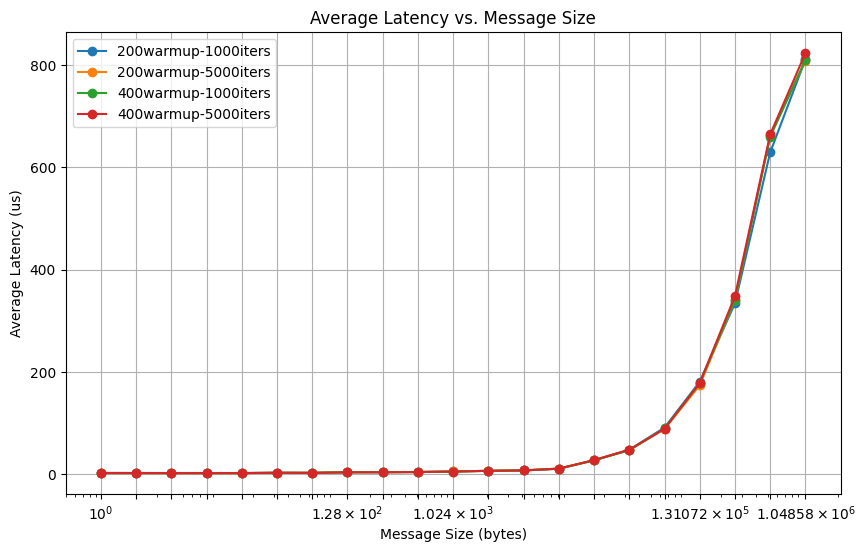

In [5]:
plt.figure(figsize=(10,6))

plt.plot(df_2w1i['Size'], df_2w1i['Avg_Latency_us'], label='200warmup-1000iters', marker='o')
plt.plot(df_2w5i['Size'], df_2w5i['Avg_Latency_us'], label='200warmup-5000iters', marker='o')
plt.plot(df_4w1i['Size'], df_4w1i['Avg_Latency_us'], label='400warmup-1000iters', marker='o')
plt.plot(df_4w5i['Size'], df_4w5i['Avg_Latency_us'], label='400warmup-5000iters', marker='o')

plt.title('Average Latency vs. Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Average Latency (us)')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xticks(df_2w1i['Size'])

plt.show()

### Correlation between Latency and Message Size

In [9]:
log_mex_size_1 = np.log2(df_2w1i['Size'])
log_mex_size_2 = np.log2(df_2w5i['Size'])
log_mex_size_3 = np.log2(df_4w1i['Size'])
log_mex_size_4 = np.log2(df_4w5i['Size'])

# 200 warmup - 1000 iters
corr_avg_lat_1 = log_mex_size_1.corr(df_2w1i["Avg_Latency_us"])
corr_min_lat_1 = log_mex_size_1.corr(df_2w1i["Min_Latency_us"])
corr_max_lat_1 = log_mex_size_1.corr(df_2w1i["Max_Latency_us"])

# 200 warmup - 5000 iters
corr_avg_lat_2 = log_mex_size_2.corr(df_2w5i["Avg_Latency_us"])
corr_min_lat_2 = log_mex_size_2.corr(df_2w5i["Min_Latency_us"])
corr_max_lat_2 = log_mex_size_2.corr(df_2w5i["Max_Latency_us"])

# 400 warmup - 1000 iters
corr_avg_lat_3 = log_mex_size_3.corr(df_4w1i["Avg_Latency_us"])
corr_min_lat_3 = log_mex_size_3.corr(df_4w1i["Min_Latency_us"])
corr_max_lat_3 = log_mex_size_3.corr(df_4w1i["Max_Latency_us"])

# 400 warmup - 5000 iters
corr_avg_lat_4 = log_mex_size_4.corr(df_4w5i["Avg_Latency_us"])
corr_min_lat_4 = log_mex_size_4.corr(df_4w5i["Min_Latency_us"])
corr_max_lat_4 = log_mex_size_4.corr(df_4w5i["Max_Latency_us"])

# Summary table

latency_avg_corr = [corr_avg_lat_1,corr_avg_lat_2,corr_avg_lat_3,corr_avg_lat_4]
latency_min_corr = [corr_min_lat_1,corr_min_lat_2,corr_min_lat_3,corr_min_lat_4]
latency_max_corr = [corr_max_lat_1,corr_max_lat_2,corr_max_lat_3,corr_max_lat_4]

summary_table2 = pd.DataFrame({
    "Average Latency Correlation": latency_avg_corr,
    "Minimum Latency Correlation": latency_min_corr,
    "Maximum Latency Correlation": latency_max_corr
})

summary_table2.index = ["200 warm-up; 1000 iters","200 warm-up; 5000 iters","400 warm-up; 1000 iters","400 warm-up; 5000 iters"]


In [7]:
print(summary_table2)

                         Average Latency Correlation  \
200 warm-up; 1000 iters                     0.672988   
200 warm-up; 5000 iters                     0.670816   
400 warm-up; 1000 iters                     0.671972   
400 warm-up; 5000 iters                     0.671257   

                         Minimum Latency Correlation  \
200 warm-up; 1000 iters                     0.563112   
200 warm-up; 5000 iters                     0.567646   
400 warm-up; 1000 iters                     0.558138   
400 warm-up; 5000 iters                     0.558204   

                         Maximum Latency Correlation  
200 warm-up; 1000 iters                     0.695211  
200 warm-up; 5000 iters                     0.687202  
400 warm-up; 1000 iters                     0.693863  
400 warm-up; 5000 iters                     0.687607  


### Average Latency Increase Distribution

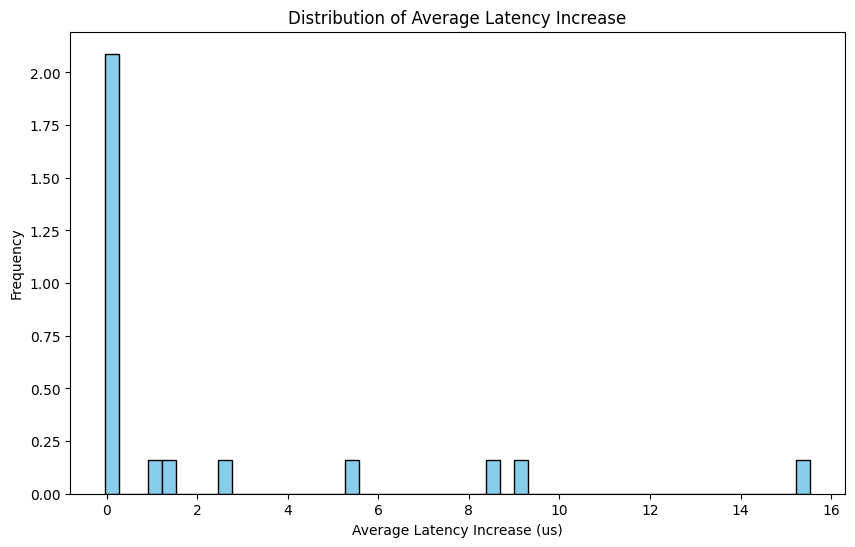

Outliers in Average Latency:
        Size  Avg_Latency_us  Min_Latency_us  Max_Latency_us  Iterations  \
17   131072          180.63           67.42          286.58        1000   
18   262144          334.13          124.26          541.26        1000   
19   524288          629.18          240.75          992.92        1000   
20  1048576          811.08          691.02          874.15        1000   

    Avg_Latency_Increase  
17              5.280000  
18              8.527778  
19             15.528947  
20              9.095000  


In [8]:
# HISTOGRAM

plt.figure(figsize=(10, 6))
plt.hist(df_2w1i["Avg_Latency_Increase"], bins=50, color="skyblue", edgecolor="black", density=True)
plt.xlabel("Average Latency Increase (us)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Latency Increase")

#plt.yscale('log')
plt.show()

# OUTLIERS DETECTION

Q1 = df_2w1i["Avg_Latency_Increase"].quantile(0.25)
Q3 = df_2w1i["Avg_Latency_Increase"].quantile(0.75)
IQR = Q3 - Q1

# Outliers are points that fall outside 1.5*IQR from Q1 or Q3
outliers = df_2w1i[(df_2w1i["Avg_Latency_Increase"] < (Q1 - 1.5 * IQR)) | (df_2w1i["Avg_Latency_Increase"] > (Q3 + 1.5 * IQR))]
print("Outliers in Average Latency:\n", outliers)

## Comparison of latency behaviour between different algorithms

The minimum increase in mean latency and its standard deviation between runs that we performed on the thin node of ORFEO cluster is given by $200$ warm-up iterations and $1000$ iterations - which are the default values.  
So, these are the values for which we computed runs over the same node with $2$ other algorithms. 

In [5]:
benchmark_1_THIN = 'benchmark_1_THIN.txt'
benchmark_2_THIN = 'benchmark_2_THIN.txt'

df_1_thin = pd.read_csv(benchmark_1_THIN, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_2_thin = pd.read_csv(benchmark_2_THIN, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])

### Mean and standard deviation of increase in average latency

In [6]:
df_1_thin['Avg_Latency_Increase'] = df_1_thin['Avg_Latency_us'].diff()/np.log2(df_1_thin["Size"])
df_1_thin_lat_increase = df_1_thin['Avg_Latency_Increase'].dropna()

df_1_thin_mean_increase = df_1_thin_lat_increase.mean()
df_1_thin_std_increase = df_1_thin_lat_increase.std()
# ---
df_2_thin['Avg_Latency_Increase'] = df_2_thin['Avg_Latency_us'].diff()/np.log2(df_2_thin["Size"])
df_2_thin_lat_increase = df_2_thin['Avg_Latency_Increase'].dropna()

df_2_thin_mean_increase = df_2_thin_lat_increase.mean()
df_2_thin_std_increase = df_2_thin_lat_increase.std()
# ---

# Summary table

latency_mean_increases = [df_2w1i_mean_increase,df_1_thin_mean_increase,df_2_thin_mean_increase]
latency_std_increase = [df_2w1i_std_increase,df_1_thin_std_increase,df_2_thin_std_increase]

summary_table3 = pd.DataFrame({
    "Mean Latency Increase": latency_mean_increases,
    "Std Latency Increase": latency_std_increase
})

summary_table3.index = ["Baseline algorithm","Chain algorithm","Binary tree algorithm"]

print(summary_table3)

                       Mean Latency Increase  Std Latency Increase
Baseline algorithm                  2.224135              4.206955
Chain algorithm                     2.495156              5.657778
Binary tree algorithm               2.729458              6.060833


### Latency against Message Size

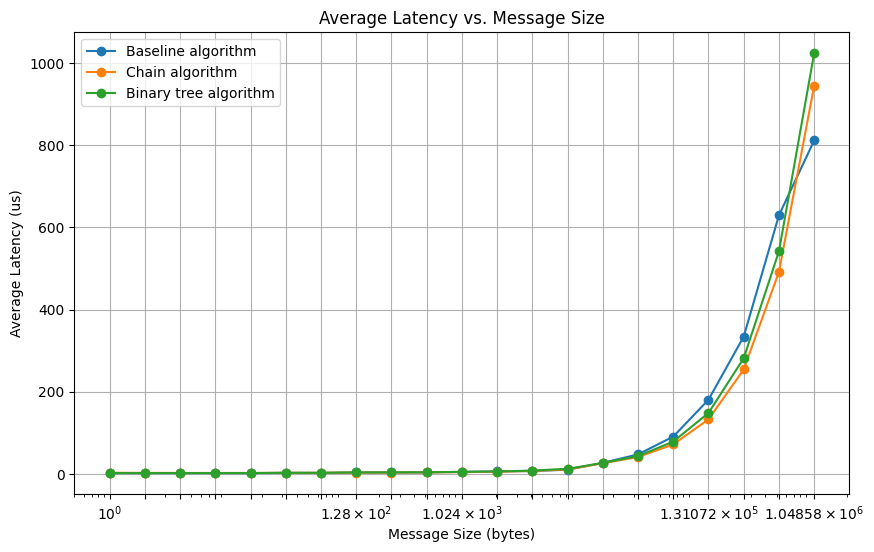

In [7]:
plt.figure(figsize=(10,6))

plt.plot(df_2w1i['Size'], df_2w1i['Avg_Latency_us'], label='Baseline algorithm', marker='o')
plt.plot(df_1_thin['Size'], df_1_thin['Avg_Latency_us'], label='Chain algorithm', marker='o')
plt.plot(df_2_thin['Size'], df_2_thin['Avg_Latency_us'], label='Binary tree algorithm', marker='o')

plt.title('Average Latency vs. Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Average Latency (us)')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xticks(df_2w1i['Size'])

plt.show()

### Correlation between latency and message size

In [11]:
log_mex_size_1_thin = np.log2(df_1_thin['Size'])
log_mex_size_2_thin = np.log2(df_2_thin['Size'])

# Chain algorithm
corr_avg_lat_1_thin = log_mex_size_1_thin.corr(df_1_thin["Avg_Latency_us"])
corr_min_lat_1_thin = log_mex_size_1_thin.corr(df_1_thin["Min_Latency_us"])
corr_max_lat_1_thin = log_mex_size_1_thin.corr(df_1_thin["Max_Latency_us"])

# Binary tree algorithm
corr_avg_lat_2_thin = log_mex_size_2_thin.corr(df_2_thin["Avg_Latency_us"])
corr_min_lat_2_thin = log_mex_size_2_thin.corr(df_2_thin["Min_Latency_us"])
corr_max_lat_2_thin = log_mex_size_2_thin.corr(df_2_thin["Max_Latency_us"])

# Summary table

latency_avg_corr = [corr_avg_lat_1,corr_avg_lat_1_thin,corr_avg_lat_2_thin]
latency_min_corr = [corr_min_lat_1,corr_min_lat_1_thin,corr_min_lat_2_thin]
latency_max_corr = [corr_max_lat_1,corr_max_lat_1_thin,corr_max_lat_2_thin]

summary_table4 = pd.DataFrame({
    "Average Latency Correlation": latency_avg_corr,
    "Minimum Latency Correlation": latency_min_corr,
    "Maximum Latency Correlation": latency_max_corr
})

summary_table4.index = ["Baseline algorithm","Chain algorithm","Binary tree algorithm"]

print(summary_table4)

                       Average Latency Correlation  \
Baseline algorithm                        0.672988   
Chain algorithm                           0.620800   
Binary tree algorithm                     0.623830   

                       Minimum Latency Correlation  \
Baseline algorithm                        0.563112   
Chain algorithm                           0.624111   
Binary tree algorithm                     0.615381   

                       Maximum Latency Correlation  
Baseline algorithm                        0.695211  
Chain algorithm                           0.616434  
Binary tree algorithm                     0.630770  
